# Handwritten Digit Classification


For this Hands-on, we will use the popular scikit-learn library to build a basic classifier. The MNIST dataset contains images of handwritten digits, and the task is to classify each image into its corresponding digit (0 to 9).

## Import Libraries

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

2023-11-12 16:24:38.957619: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/turki/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load the Dataset

**Question 1:** Load the train and test subsets of the mnist dataset from Keras

In [2]:
import tensorflow as tf

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


## Data Pre-Processing

**Question 2:**  

*   Adjust the input shape to match the one the model is expecting
*   Normalize the values of the pixels
*   Turn labels into categories using the to_categorical function

In [3]:
# Preprocess the data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)) / 255.0
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)) / 255.0


# Convert labels to one-hot encoded form
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Build and train a CNN

**Question 3:** Create a Convolutional neural Network of your choice and be carefyl while you select the following:


*   input shape
*   activation function at the output layer
*   number of output neurons



In [4]:

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

**Question 4:** Compile and train the model. Choose an appropriate loss function, optimizer, and print out the accuracy of the model.

In [5]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 28s 18ms/step - loss: 0.1801 - accuracy: 0.9466 - val_loss: 0.0774 - val_accuracy: 0.9767
Epoch 2/5
1500/1500 [==============================] - 25s 16ms/step - loss: 0.0613 - accuracy: 0.9818 - val_loss: 0.0603 - val_accuracy: 0.9822
Epoch 3/5
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0388 - accuracy: 0.9882 - val_loss: 0.0588 - val_accuracy: 0.9819
Epoch 4/5
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0283 - accuracy: 0.9911 - val_loss: 0.0467 - val_accuracy: 0.9861
Epoch 5/5
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0185 - accuracy: 0.9941 - val_loss: 0.0550 - val_accuracy: 0.9851


## Evaluate the Model's performance

**Question 5:** Plot the training and validation accuracy to better understand the performance of the model.

313/313 [==============================] - 2s 5ms/step - loss: 0.0525 - accuracy: 0.9850
Test Accuracy: 0.9850000143051147


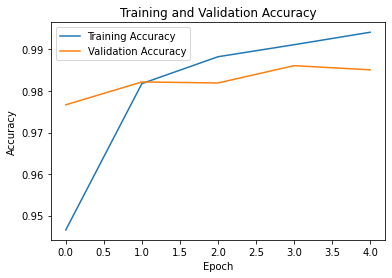

In [6]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()
